# Visualisation of results

In [1]:
import pandas as pd

In [15]:
# load image coordinates
df = pd.read_csv('./data/test/images.txt',  names=["number", "lat", "long", "zoom"])
df.head()

,number,lat,long,zoom
0,25,59.937172,10.807871,NaN
1,26,59.937172,10.810871,NaN
2,27,59.937172,10.813871,NaN
3,28,59.937172,10.816872,NaN
4,29,59.937172,10.819871,NaN


[10.707870864868164, 10.934871292114257, 59.83717193603516, 60.064168548583986]
   number        lat       long  zoom
0      25  59.937172  10.807871   NaN
1      26  59.937172  10.810871   NaN
2      27  59.937172  10.813871   NaN
3      28  59.937172  10.816872   NaN
4      29  59.937172  10.819871   NaN


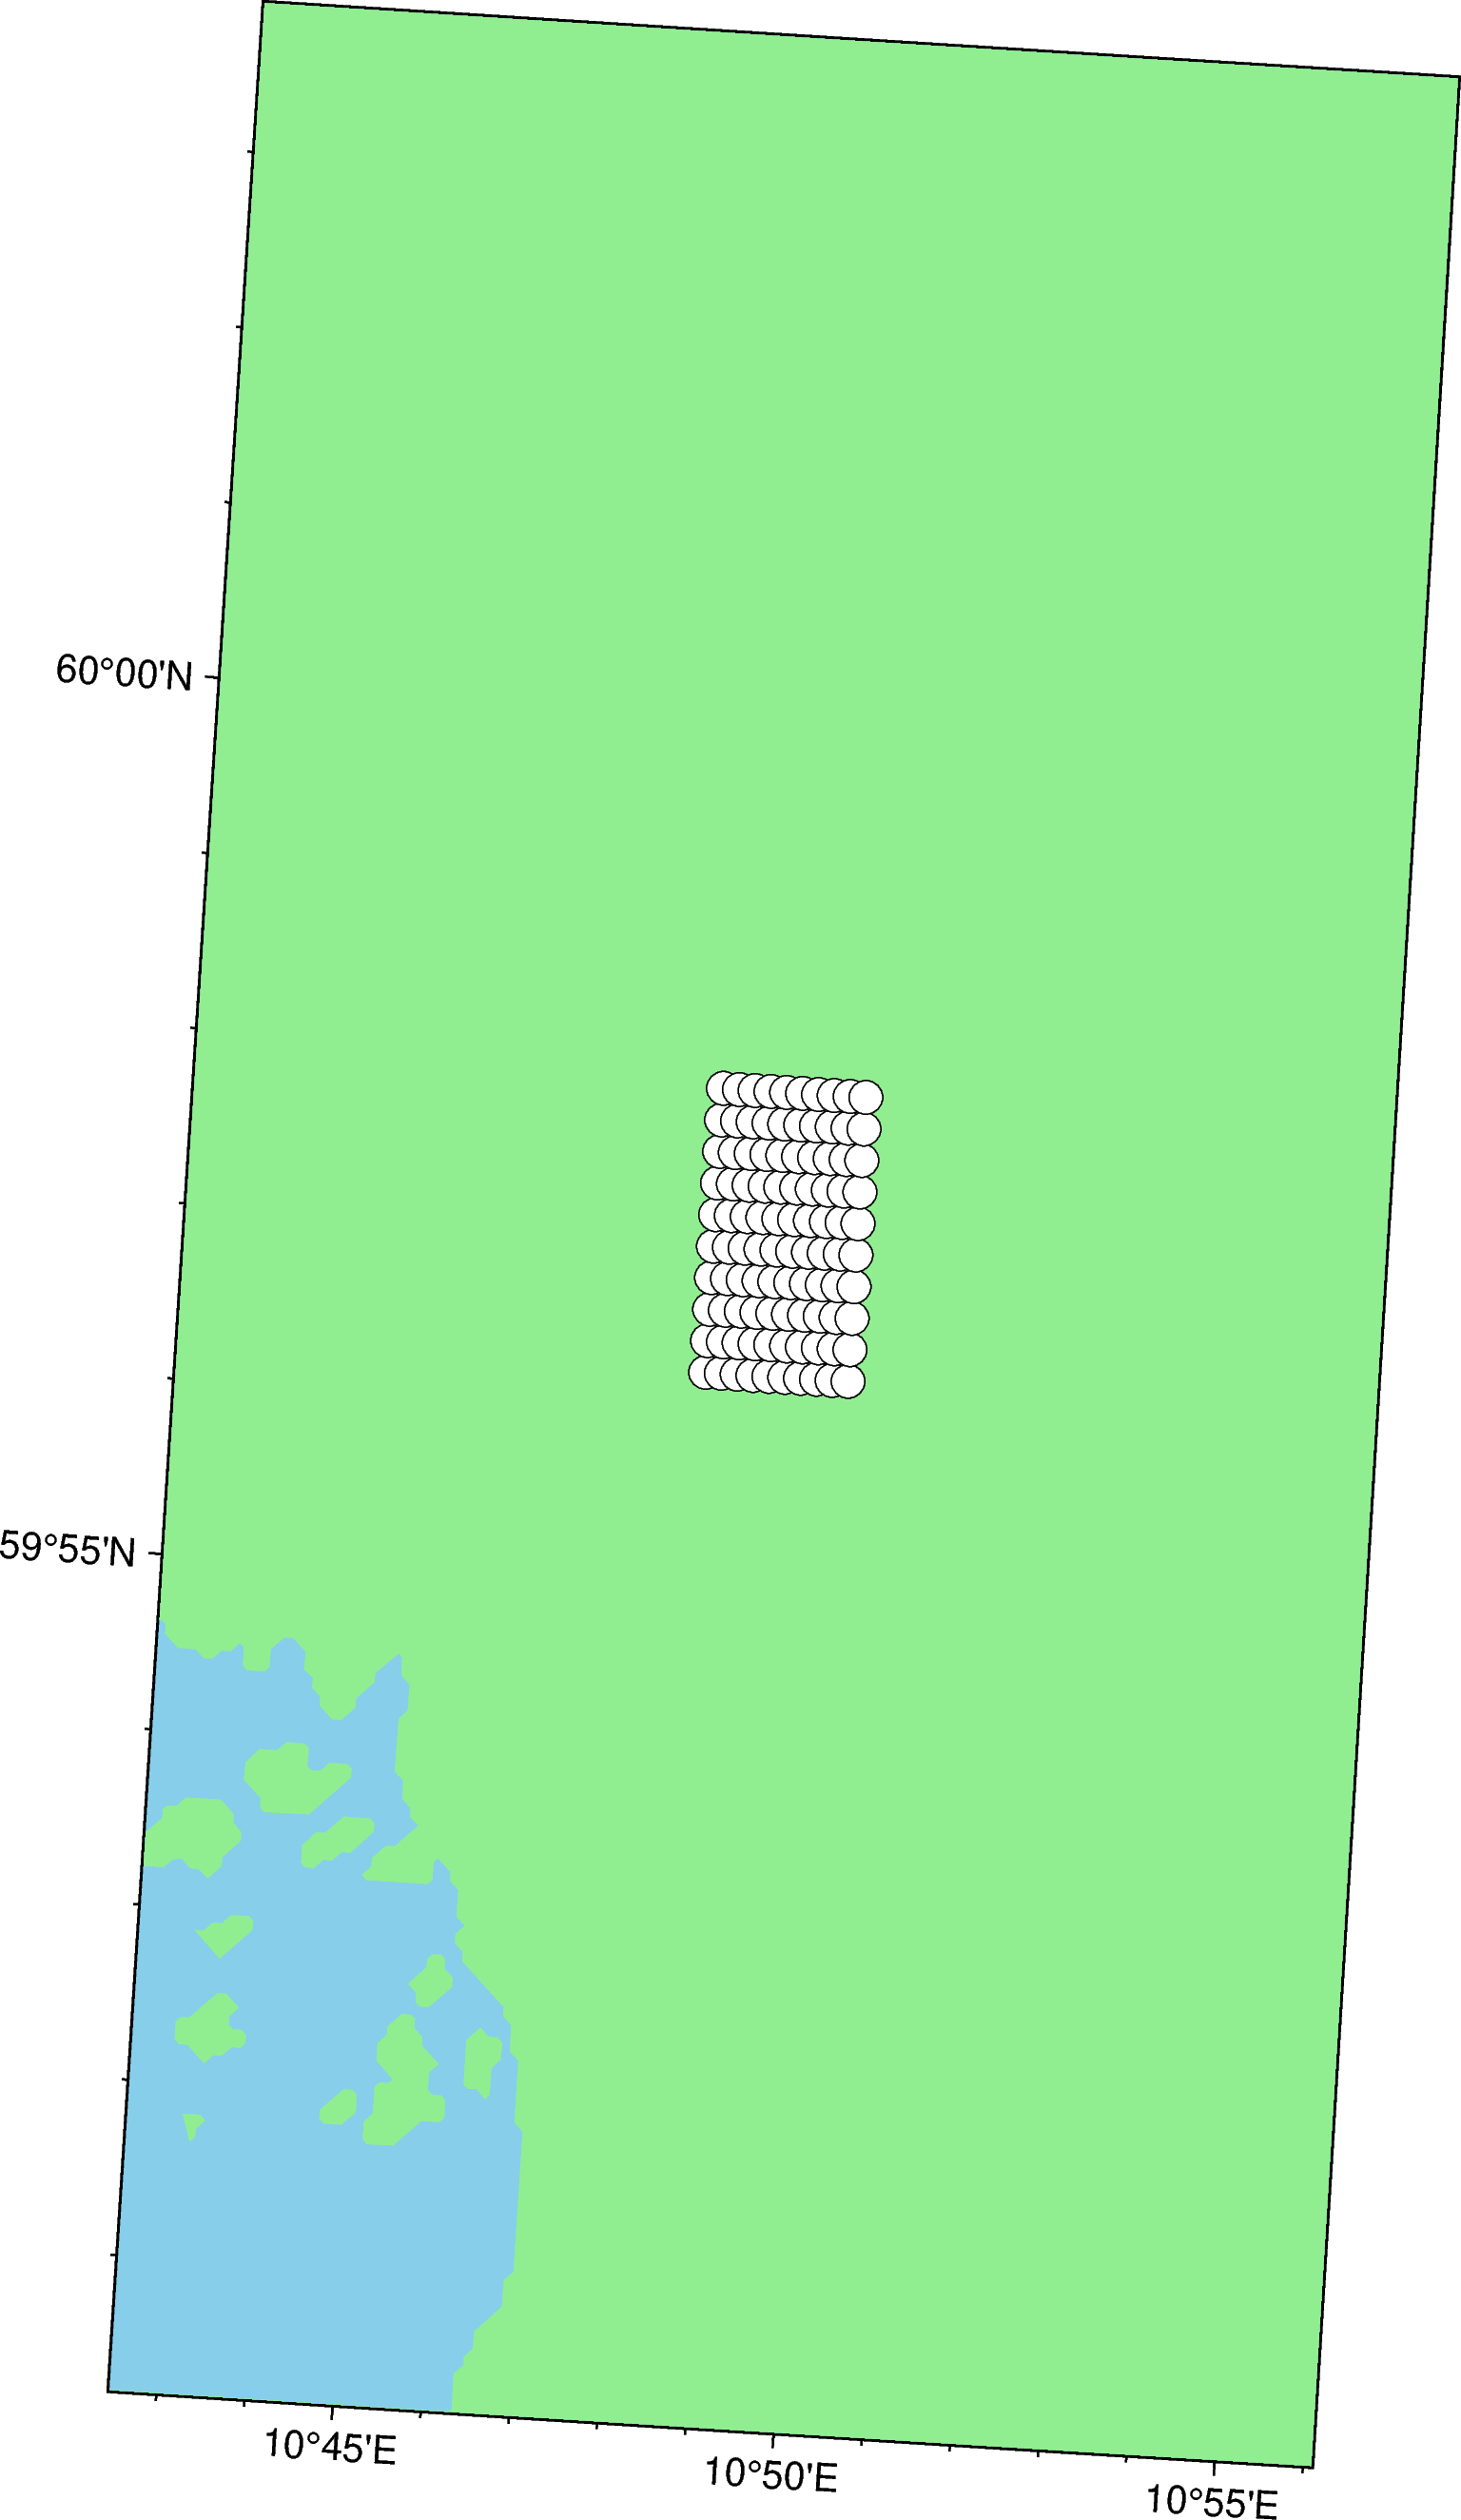

In [23]:
import pygmt

region = [
    df.long.min() - 0.1,
    df.long.max() + 0.1,
    df.lat.min() - 0.1,
    df.lat.max() + 0.1,
]

print(region)
print(df.head())

fig = pygmt.Figure()
fig.basemap(region=region, projection="U33R/12c", frame=True)
fig.coast(land="lightgreen", water="skyblue")
fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
fig.show()
fig.savefig('./figures/map.png'), dpi=400)
